### Future Changes to Improve Data and Models

When ready to refine the data and test different approaches, consider the following changes:

---

#### **1. Handle Multicollinearity**
1. **Remove One Feature**:
   - Drop one of the highly correlated features (`AveRooms` or `AveBedrms`).
   - Suggested Action:
     - Drop `AveBedrms` (if `AveRooms` is more predictive).
     ```python
     housing_df = housing_df.drop('AveBedrms', axis=1)
     ```

2. **Combine Features**:
   - Create a new feature: **Room-to-Bedroom Ratio**.
     ```python
     housing_df['RoomToBedroomRatio'] = housing_df['AveRooms'] / housing_df['AveBedrms']
     ```
   - Drop the original features:
     ```python
     housing_df = housing_df.drop(['AveRooms', 'AveBedrms'], axis=1)
     ```

---

#### **2. Address Skewness in the Target**
- The target variable (`Target`) is right-skewed. Apply a **logarithmic transformation** to make it more symmetric.
- Suggested Action:
  ```python
  import numpy as np
  housing_df['Target_Log'] = np.log1p(housing_df['Target'])


<hr style="height:2px;border-width:0;color:black;background-color:black">

### Importing libraries and packages

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
raw_housing = fetch_california_housing() #fetching data from sklearn

In [4]:
#creating pandas dataframe
housing = pd.DataFrame(raw_housing.data, columns = raw_housing.feature_names)
housing['MedHouseVal'] = raw_housing.target
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
enhanced_housing = housing.copy()

In [6]:
# Create the Room-to-Bedroom Ratio feature
enhanced_housing['RoomToBedroomRatio'] = enhanced_housing['AveRooms'] / enhanced_housing['AveBedrms']
enhanced_housing = enhanced_housing.drop(['AveRooms', 'AveBedrms'], axis=1)

In [7]:
enhanced_housing.head()

,MedInc,HouseAge,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomToBedroomRatio
0,8.3252,41.0,322.0,2.555556,37.88,-122.23,4.526,6.821705
1,8.3014,21.0,2401.0,2.109842,37.86,-122.22,3.585,6.418626
2,7.2574,52.0,496.0,2.802260,37.85,-122.24,3.521,7.721053
3,5.6431,52.0,558.0,2.547945,37.85,-122.25,3.413,5.421277
4,3.8462,52.0,565.0,2.181467,37.85,-122.25,3.422,5.810714


In [8]:
#df = df[[col for col in df.columns if col != 'A'] + ['A']]
enhanced_housing = enhanced_housing[[col for col in enhanced_housing.columns if col != 'MedHouseVal'] + ['MedHouseVal']]

In [9]:
enhanced_housing.head()

,MedInc,HouseAge,Population,AveOccup,Latitude,Longitude,RoomToBedroomRatio,MedHouseVal
0,8.3252,41.0,322.0,2.555556,37.88,-122.23,6.821705,4.526
1,8.3014,21.0,2401.0,2.109842,37.86,-122.22,6.418626,3.585
2,7.2574,52.0,496.0,2.802260,37.85,-122.24,7.721053,3.521
3,5.6431,52.0,558.0,2.547945,37.85,-122.25,5.421277,3.413
4,3.8462,52.0,565.0,2.181467,37.85,-122.25,5.810714,3.422


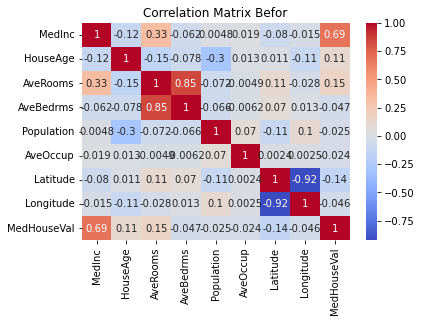

In [10]:
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Befor")
plt.show()

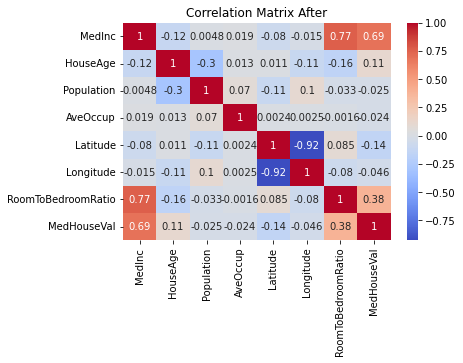

In [11]:
sns.heatmap(enhanced_housing.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix After")
plt.show()

### Adding `RoomToBedroomRatio` Feature

#### **What I Did**
- I created a new feature, `RoomToBedroomRatio`, by dividing the average number of rooms (`AveRooms`) by the average number of bedrooms (`AveBedrms`).
- After creating the new feature, I removed the original columns (`AveRooms` and `AveBedrms`) to avoid redundancy.

#### **Why I Did It**
- `AveRooms` and `AveBedrms` are highly correlated features, and keeping both could introduce multicollinearity, which can negatively impact certain machine learning models like Linear Regression.
- The new feature, `RoomToBedroomRatio`, captures meaningful information about how space is distributed in a house:
  - A higher ratio implies more living space relative to the number of bedrooms, which might influence house prices.
- By reducing redundancy and creating a meaningful derived feature, this step simplifies the dataset and can potentially improve model performance.

#### **Code Implementation**
```python
# Create a new feature: Room-to-Bedroom Ratio
enhanced_housing = housing.copy()  # Create a copy of the original DataFrame
enhanced_housing['RoomToBedroomRatio'] = enhanced_housing['AveRooms'] / enhanced_housing['AveBedrms']

# Drop the original features
enhanced_housing = enhanced_housing.drop(['AveRooms', 'AveBedrms'], axis=1)

# Display the updated DataFrame
print(enhanced_housing.head())


<hr style="height:1px;border-width:0;color:black;background-color:black">

# Simple Linear Regression

In [92]:
X = enhanced_housing.drop(['MedHouseVal', 'LogMedHouseVal'], axis=1)
y = enhanced_housing['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'The intercept is: {lm.intercept_}')

The intercept is: -32.52030791426036


In [94]:
predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.2f} ({r2 * 100:.2f}%)")

R² Score: 0.61 (60.70%)


In [137]:
r2_original = r2_score(np.expm1(y_test), np.expm1(predictions))
print(f"R² Score (Inverse-Transformed Back): {r2_original:.2f} ({r2_original * 100:.2f}%)")

R² Score (Inverse-Transformed Back): -0.17 (-17.32%)


<hr style="height:1px;border-width:0;color:black;background-color:black">

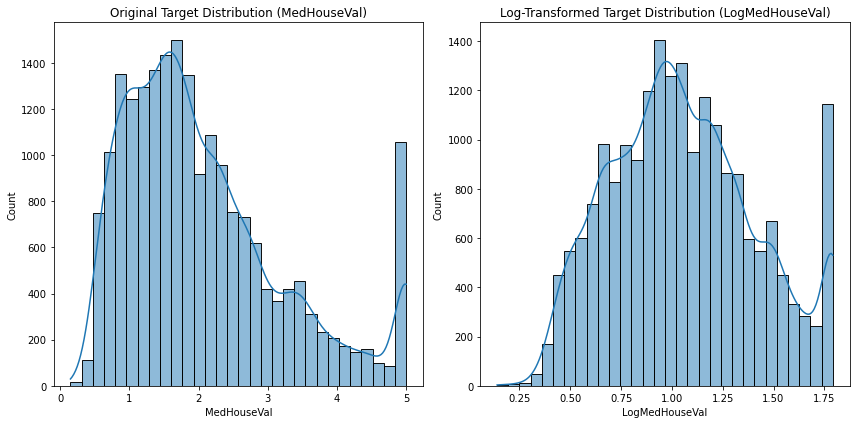

In [98]:
# Apply log transformation to the target variable
enhanced_housing['LogMedHouseVal'] = np.log1p(enhanced_housing['MedHouseVal'])

# Plot the original and transformed target distributions
plt.figure(figsize=(12, 6))

# Original target distribution
plt.subplot(1, 2, 1)
sns.histplot(enhanced_housing['MedHouseVal'], kde=True, bins=30)
plt.title("Original Target Distribution (MedHouseVal)")

# Transformed target distribution
plt.subplot(1, 2, 2)
sns.histplot(enhanced_housing['LogMedHouseVal'], kde=True, bins=30)
plt.title("Log-Transformed Target Distribution (LogMedHouseVal)")

plt.tight_layout()
plt.show()

## Training model with tranformed target

In [99]:
X = enhanced_housing.drop(['MedHouseVal', 'LogMedHouseVal'], axis=1)  # Features
y = enhanced_housing['LogMedHouseVal']                               # Transformed Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Evaluate R² score
predictions = lm.predict(X_test)
t_r2 = r2_score(y_test, predictions)
print(f"R² Score (with Log Target): {t_r2:.2f} ({t_r2 * 100:.2f}%)")

R² Score (with Log Target): 0.62 (62.30%)


# KNN

In [107]:
knn_model = KNeighborsRegressor(n_neighbors=11) #11

In [102]:
X = enhanced_housing.drop('MedHouseVal', axis=1)
y = enhanced_housing['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [104]:
knn_predictions = knn_model.predict(X_test)

In [105]:
r2_knn = r2_score(y_test, knn_predictions)
print(f"KNN R² Score: {r2_knn:.2f} ({r2_knn * 100:.2f}%)")

KNN R² Score: 0.14 (14.08%)


In [106]:
rmse_knn = mean_squared_error(y_test, knn_predictions, squared=False)
print(f"KNN RMSE: {rmse_knn:.2f}")

KNN RMSE: 1.06


# SVM

In [110]:
# Step 1: Transform the target variable
housing_df['LogMedHouseVal'] = np.log1p(housing_df['MedHouseVal'])

In [111]:
X = housing_df.drop(['MedHouseVal', 'LogMedHouseVal'], axis=1)
y = housing_df['LogMedHouseVal']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Step 4: Train the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)  # Use RBF kernel and tune C, epsilon as needed
svr_model.fit(X_train_scaled, y_train)

SVR(C=100)

In [114]:
# Step 5: Make predictions
svr_predictions_log = svr_model.predict(X_test_scaled)

In [116]:
# Evaluate the model
r2_svr = r2_score(y_test, svr_predictions_log)
print(f"SVM R² Score: {r2_svr:.2f} ({r2_svr * 100:.2f}%)")

SVM R² Score: 0.78 (77.67%)


# Implementing with Random Forest

In [114]:
# Use the original target variable (MedHouseVal)
X = enhanced_housing.drop(['MedHouseVal', 'LogMedHouseVal'], axis=1)  # Features
y = enhanced_housing['MedHouseVal']                                   # Original Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  # Default parameters
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model using R² score
r2_rf = r2_score(y_test, rf_predictions)
print(f"Random Forest R² Score: {r2_rf:.2f} ({r2_rf * 100:.2f}%)")

Random Forest R² Score: 0.80 (80.48%)


In [54]:
rf_result = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': rf_predictions,
    'Residual': y_test.values - rf_predictions
})
rf_result

,Actual,Predicted,Residual
0,0.47700,0.498750,-0.021750
1,0.45800,0.870260,-0.412260
2,5.00001,4.740036,0.259974
3,2.18600,2.570100,-0.384100
4,2.78000,2.350590,0.429410
...,...,...,...
6187,2.37500,2.062710,0.312290
6188,0.67300,0.680460,-0.007460
6189,2.18400,2.119680,0.064320
6190,1.19400,1.419910,-0.225910


## Random Forest with Hyperparameter Tuning

### Manual Search

In [85]:
new_rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
new_rf_model.fit(X_train, y_train)
new_rf_predictions = rf_model.predict(X_test)

Random Forest with manual hyperparameter tuning R² Score (Tuned): 0.80 (80.32%)


In [86]:
r2_rf_new = r2_score(y_test, rf_predictions)
print(f"Random Forest with manual hyperparameter tuning R² Score (Tuned): {r2_rf_new:.2f} ({r2_rf_new * 100:.2f}%)")

Random Forest with manual hyperparameter tuning R² Score (Tuned): 0.80 (80.32%)


### Grid Search

In [62]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='r2',
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R² Score: {grid_search.best_score_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.7942518942788777


### Random Search

In [59]:
# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R² Score: {random_search.best_score_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

<hr style="height:1px;border-width:0;color:black;background-color:black">

## Gradient Boosting

### Using Scikit-learn's GradientBoostingRegressor

In [67]:
X = enhanced_housing.drop(['MedHouseVal', 'LogMedHouseVal'], axis=1)  # Features
y = enhanced_housing['MedHouseVal']                                   # Original Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [69]:
gb_predictions = gb_model.predict(X_test)

In [84]:
r2_gb = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting R² Score: {r2_gb:.2f} ({r2_gb * 100:.2f}%)")

Gradient Boosting R² Score: 0.78 (77.87%)


### Using XGBoost

In [75]:
from xgboost import XGBRegressor

In [79]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [80]:
xgb_predictions = xgb_model.predict(X_test)

In [83]:
r2_xgb = r2_score(y_test, xgb_predictions)
print(f"XGBoost R² Score: {r2_xgb:.2f} ({r2_xgb * 100:.2f}%)")

XGBoost R² Score: 0.83 (83.32%)


### Using LightGBM

In [88]:
from lightgbm import LGBMRegressor

In [90]:
# Train a LightGBM model
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
r2_lgb = r2_score(y_test, lgb_predictions)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 7
[LightGBM] [Info] Start training from score 2.069240


In [91]:
print(f"LightGBM R² Score: {r2_lgb:.2f} ({r2_lgb * 100:.2f}%)")

LightGBM R² Score: 0.83 (83.42%)


# Final Scores of Multiple Models and Algorithms

### Linear Regression

In [122]:
print(f"Simple linear regression with combining two features(AveRooms&AveBedrms): '{r2 * 100:.2f}%'\n")

print(f"Simple linear regression with transformed target: '{t_r2 * 100:.2f}%'\n")

Simple linear regression with combining two features(AveRooms&AveBedrms): '60.70%'

Simple linear regression with transformed target: '62.30%'



### Random Forest

In [123]:
print(f"Random Forest: '{r2_rf * 100:.2f}%'\n")

print(f"Random Forest + Manual Hyperparameter tuning: '{r2_rf_new * 100:.2f}%'\n")

print(f"Random Forest + GridSearch Hyperparameter tuning: '{grid_search.best_score_ * 100:.2f}%'\n")

print(f"Random Forest + RandomSearch Hyperparameter tuning: 'X%'\n")

Random Forest: '80.48%'

Random Forest + Manual Hyperparameter tuning: '80.32%'

Random Forest + GridSearch Hyperparameter tuning: '79.43%'

Random Forest + RandomSearch Hyperparameter tuning: 'X%'



### Gradient Boosting

In [125]:
print(f"Simple Gradient Boosting: '{r2_gb * 100:.2f}%'\n")

print(f"XGBoosting: '{r2_xgb * 100:.2f}%'\n")

print(f"Light GBoosting: '{r2_lgb * 100:.2f}%'\n")

Simple Gradient Boosting: '77.87%'

XGBoosting: '83.32%'

Light GBoosting: '83.42%'



### The beset one

In [131]:
print(f"The best performance was obtained by Light Gradient Boosting Machine: '{max(r2, t_r2, r2_rf, r2_rf_new, grid_search.best_score_, r2_gb, r2_xgb, r2_lgb) * 100:.2f}%'")

The best performance was obtained by Light Gradient Boosting Machine: '83.42%'


---

In [118]:
housing_df.head()

,MedInc,HouseAge,Population,AveOccup,Latitude,Longitude,RoomToBedroomRatio,MedHouseVal,LogMedHouseVal
0,8.3252,41.0,322.0,2.555556,37.88,-122.23,6.821705,4.526,1.709464
1,8.3014,21.0,2401.0,2.109842,37.86,-122.22,6.418626,3.585,1.522790
2,7.2574,52.0,496.0,2.802260,37.85,-122.24,7.721053,3.521,1.508733
3,5.6431,52.0,558.0,2.547945,37.85,-122.25,5.421277,3.413,1.484555
4,3.8462,52.0,565.0,2.181467,37.85,-122.25,5.810714,3.422,1.486592


In [123]:
enhanced_housing.columns

Index(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude', 'Longitude',
       'RoomToBedroomRatio', 'MedHouseVal'],
      dtype='object')

C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

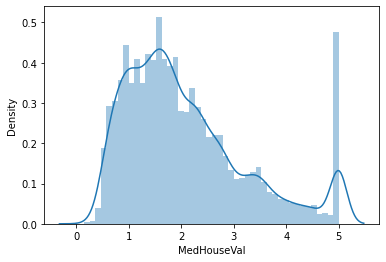

In [131]:
sns.distplot(enhanced_housing['MedHouseVal'])

In [133]:
X.head()

,MedInc,HouseAge,Population,AveOccup,Latitude,Longitude,RoomToBedroomRatio
0,8.3252,41.0,322.0,2.555556,37.88,-122.23,6.821705
1,8.3014,21.0,2401.0,2.109842,37.86,-122.22,6.418626
2,7.2574,52.0,496.0,2.802260,37.85,-122.24,7.721053
3,5.6431,52.0,558.0,2.547945,37.85,-122.25,5.421277
4,3.8462,52.0,565.0,2.181467,37.85,-122.25,5.810714


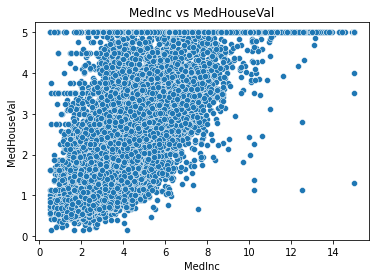

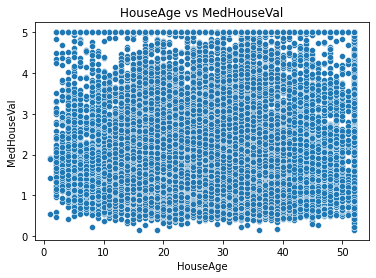

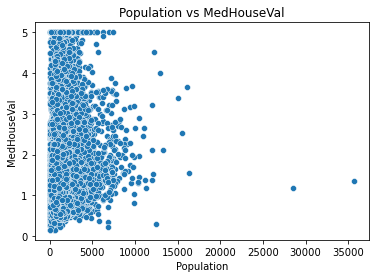

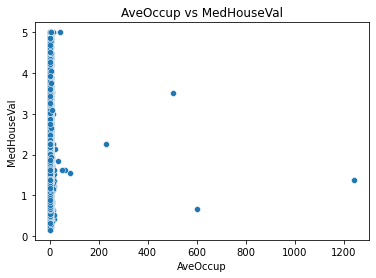

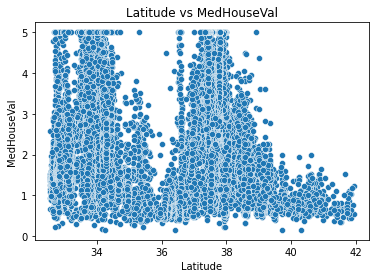

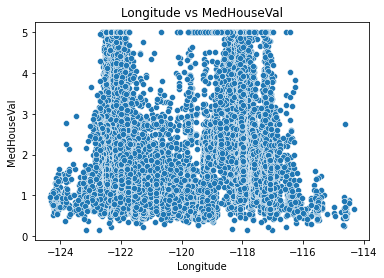

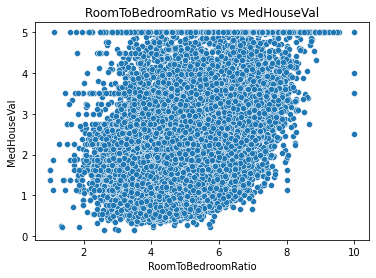

In [134]:
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=enhanced_housing[column], y=enhanced_housing['MedHouseVal'])
    plt.title(f'{column} vs MedHouseVal')
    plt.xlabel(column)
    plt.ylabel('MedHouseVal')
    plt.show()

In [1]:
pow(2,3)

8